In [1]:
import sys
import os
from datetime import datetime
from sklearn import preprocessing, impute
from src.processing import preprocessors as pp
from src.processing import data_management
from src.models import clustering_training as ct
from src.config import config


In [2]:
# read training data
data = data_management.load_dataset(file_name=config.TRAINING_DATA_FILE)[config.cfg.train.numerical_columns]

In [3]:
data.sample(5)

,MSSubClass,OverallQual,OverallCond,1stFlrSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,LotFrontage
433,60,6,5,926,1604,0,1,2,100.0
1389,50,6,6,869,1218,0,1,2,60.0
641,60,7,5,1057,1929,1,1,2,NaN
128,60,6,5,660,1348,0,1,2,69.0
63,70,7,6,902,1710,0,0,2,50.0


In [4]:
data.describe()

,MSSubClass,OverallQual,OverallCond,1stFlrSF,GrLivArea,BsmtFullBath,Fireplaces,GarageCars,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,56.897260,6.099315,5.575342,1162.626712,1515.463699,0.425342,0.613014,1.767123,70.049958
std,42.300571,1.382997,1.112799,386.587738,525.480383,0.518911,0.644666,0.747315,24.284752
min,20.000000,1.000000,1.000000,334.000000,334.000000,0.000000,0.000000,0.000000,21.000000
25%,20.000000,5.000000,5.000000,882.000000,1129.500000,0.000000,0.000000,1.000000,59.000000
50%,50.000000,6.000000,5.000000,1087.000000,1464.000000,0.000000,1.000000,2.000000,69.000000
75%,70.000000,7.000000,6.000000,1391.250000,1776.750000,1.000000,1.000000,2.000000,80.000000
max,190.000000,10.000000,9.000000,4692.000000,5642.000000,3.000000,3.000000,4.000000,313.000000


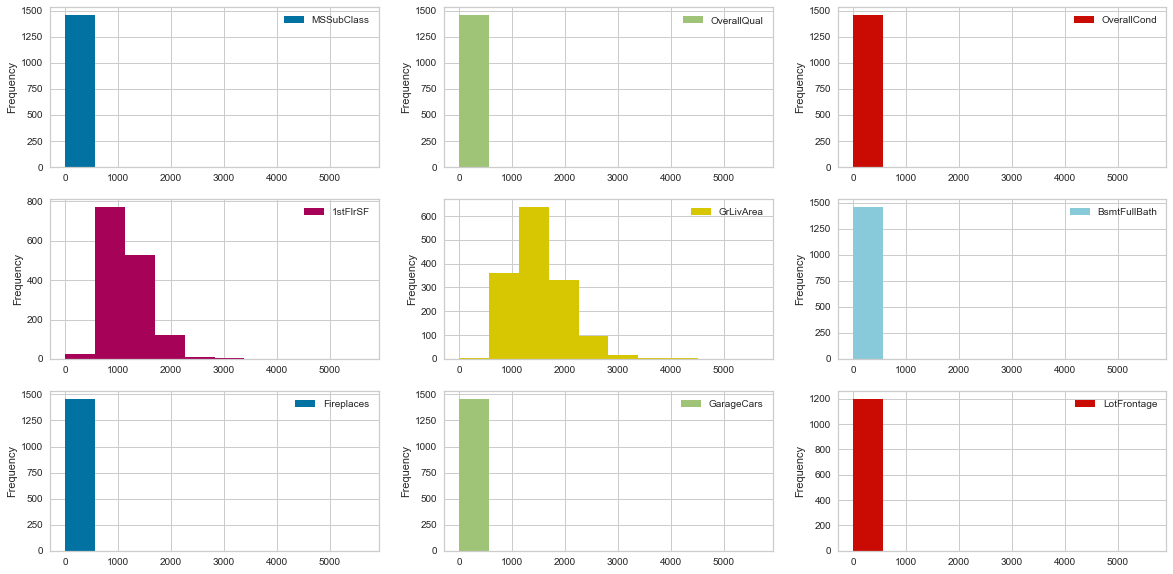

In [5]:
data.plot.hist(subplots=True, layout=(-1,3), figsize=(20,10), sharex=False, sharey=False);

In [6]:
param_grid = ct.create_param_grid(
        winsorizer_columns=[],
        min_clusters=6,
        max_clusters=15)

param_grid

{'transform_inputs__numerical_preprocessing__preprocessor': [None,
  Winsorizer(distribution='quantiles', fold=0.01, variables=[])],
 'transform_inputs__numerical_preprocessing__transformer': [PowerTransformer()],
 'transform_inputs__numerical_preprocessing__reduce_dim': [None,
  PCA(n_components=0.9)],
 'clustering': [KMeans(max_iter=1000, n_clusters=6, random_state=42),
  KMeans(max_iter=1000, n_clusters=7, random_state=42),
  KMeans(max_iter=1000, random_state=42),
  KMeans(max_iter=1000, n_clusters=9, random_state=42),
  KMeans(max_iter=1000, n_clusters=10, random_state=42),
  KMeans(max_iter=1000, n_clusters=11, random_state=42),
  KMeans(max_iter=1000, n_clusters=12, random_state=42),
  KMeans(max_iter=1000, n_clusters=13, random_state=42),
  KMeans(max_iter=1000, n_clusters=14, random_state=42)]}

In [7]:
clustering_training = ct.ClusteringTraining(data=data.fillna(0),
                                            numerical_columns=config.cfg.train.numerical_columns,
                                            categorical_columns=[],
                                            param_grid=param_grid,
                                            output_directory=str(config.TRAINED_MODEL_DIR))

2021-01-12 10:33:47,766 — src.models.clustering_training — INFO —__init__:225 — Training clustering dataset instantiated with succes!
2021-01-12 10:33:47,771 — src.models.clustering_training — INFO —__init__:226 — Dataset contains 1460 rows and 9 columns
2021-01-12 10:33:47,779 — src.models.clustering_training — DEBUG —__init__:228 — 9 Numerical columns:
 ['MSSubClass', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea', 'BsmtFullBath', 'Fireplaces', 'GarageCars', 'LotFrontage']
2021-01-12 10:33:47,790 — src.models.clustering_training — INFO —__init__:230 — 0 Categorical columns: []
2021-01-12 10:33:47,844 — src.models.clustering_training — INFO —__init__:232 — descriptive analysis:
               count         mean         std    min     25%     50%      75%     max
MSSubClass    1460.0    56.897260   42.300571   20.0    20.0    50.0    70.00   190.0
OverallQual   1460.0     6.099315    1.382997    1.0     5.0     6.0     7.00    10.0
OverallCond   1460.0     5.575342    1.112799  

In [8]:
 clustering_training.make_data_training_report()

2021-01-12 10:33:47,859 — src.models.clustering_training — INFO —make_data_training_report:247 — Creating html report about input data ...


Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

2021-01-12 10:34:02,665 — src.models.clustering_training — INFO —make_data_training_report:250 — The report was saved in /Users/diegofernandezgil/Desktop/projects/cookicutter_dev/trained_modelsdata_training_analysis.html...


In [9]:
clustering_training.configure_clustering_preprocessing_pipeline(
        numerical_preprocessor="passthrough",
        numerical_imputer=impute.SimpleImputer(),
        numerical_transformer="passthrough",
        categorical_imputer=impute.SimpleImputer(strategy='most_frequent'),
        categorical_transformer=preprocessing.OneHotEncoder(
            categories='auto', sparse=False, handle_unknown='ignore'),
        reduced_dimension_algorithm="passthrough",
        cluster_algorithm="passthrough"
    )

2021-01-12 10:34:02,772 — src.models.clustering_training — INFO —configure_clustering_preprocessing_pipeline:308 — configured pipeline:
 Pipeline(steps=[('transform_inputs',
                 ColumnTransformer(transformers=[('numerical_preprocessing',
                                                  Pipeline(steps=[('preprocessor',
                                                                   'passthrough'),
                                                                  ('imputer',
                                                                   SimpleImputer()),
                                                                  ('transformer',
                                                                   'passthrough'),
                                                                  ('reduce_dim',
                                                                   'passthrough')]),
                                                  <BoxList: ['MSSubClass', 'OverallQual',

In [10]:
clustering_training.training_grid_search(
        n_jobs=-2, scorer=ct.cv_silhouette_scorer)

2021-01-12 10:34:02,776 — src.models.clustering_training — INFO —training_grid_search:323 — Training the models
[ColumnTransformer]  (1 of 1) Processing numerical_preprocessing, total=   0.0s
2021-01-12 10:34:36,186 — src.models.clustering_training — DEBUG —training_grid_search:342 — Max score: 0.21052175121484587
2021-01-12 10:34:36,186 — src.models.clustering_training — DEBUG —training_grid_search:344 — Sample per cluster: [(0, 124), (1, 94), (2, 112), (3, 130), (4, 174), (5, 130), (6, 103), (7, 108), (8, 98), (9, 94), (10, 51), (11, 76), (12, 104), (13, 62)]
2021-01-12 10:34:36,259 — src.models.clustering_training — DEBUG —training_grid_search:346 — Best pipeline:
 {'memory': None, 'steps': [('transform_inputs', ColumnTransformer(transformers=[('numerical_preprocessing',
                                 Pipeline(steps=[('preprocessor',
                                                  Winsorizer(distribution='quantiles',
                                                             f

2021-01-12 10:34:36,259 — src.models.clustering_training — INFO —training_grid_search:349 — Save pipeline with best model...
2021-01-12 10:34:36,267 — src.processing.data_management — INFO —save_pipeline_model:69 — saved pipeline: clustering_pipeline.pkl
2021-01-12 10:34:36,268 — src.models.clustering_training — INFO —training_grid_search:356 — Saving result experiment in /Users/diegofernandezgil/Desktop/projects/cookicutter_dev/trained_models


In [17]:
clustering_training.create_cluster_analysis_report()

2021-01-12 10:42:12,001 — src.models.clustering_training — INFO —create_cluster_analysis_report:428 — Create visualization report in:/Users/diegofernandezgil/Desktop/projects/cookicutter_dev/trained_models
2021-01-12 10:42:12,002 — src.models.clustering_training — INFO —create_cluster_sumary:372 — Creating cluster variables summary
2021-01-12 10:42:12,090 — src.models.clustering_training — INFO —create_cluster_analysis_report:436 — cluster_summary.xls saved
2021-01-12 10:42:12,123 — src.models.clustering_training — INFO —create_cluster_analysis_report:439 — cluster_summary.html saved
2021-01-12 10:42:12,124 — src.models.clustering_training — INFO —create_descriptive_analysis_variables:382 — Creating cluster variables summary detailed
2021-01-12 10:42:12,533 — src.models.clustering_training — INFO —create_cluster_analysis_report:446 — descriptive_analysis_variables.xls saved
2021-01-12 10:42:12,647 — src.models.clustering_training — INFO —create_cluster_analysis_report:449 — descriptive

In [14]:
clustering_training.create_umap_cluster_representation(
        neighbors=20, n_components=3, min_dist=.5,
        #hover_name=data["user_id"].astype(str),
        #animation_frame=df.index.get_level_values("month").astype(str),
        animation_group="cluster",
        hover_data=clustering_training.categorical_columns+clustering_training.numerical_columns)

2021-01-12 10:39:50,563 — src.models.clustering_training — INFO —create_umap_cluster_representation:401 — Training UMAP ...
2021-01-12 10:39:59,049 — src.models.clustering_training — INFO —create_umap_cluster_representation:414 — Building plot ...
2021-01-12 10:40:00,037 — src.models.clustering_training — INFO —create_umap_cluster_representation:424 — Saving in /Users/diegofernandezgil/Desktop/projects/cookicutter_dev/trained_models/index.html...
